# Calculation of dark matter spectrum

This notebook shows how to use the ```dmspectrum``` to compute spectrum from dark-matter annihilations or decay.

I used PPPC4DMID tables to generate a 2D-interpolation function using ```scipy.interp2d```. You can select between the spectra including or not electroweak corrections (EW), and also the specific channel according to the available channels in the PPPC4DMID project.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ctadmtool.dmspectrum.dmspectra import dmspectrum

We can start by choosing some parameters for the dark matter particles and the target:

In [2]:
masses   = (1.e+3, 1.e+4, 1.e+5)
z        = 0.018
channel  = 'Tau'

Now, we can use the class method to create an instance of the ```dmspectrum``` class. This method create the instance with some default parameters:

In [3]:
dmspec = dmspectrum.dminterp2d(channel, z)

In [4]:
print(dmspec.emin)

30.0


In [5]:
print(dmspec.energy)

[   30.            31.81301853    33.73560493    35.77438082
    37.936368      40.2290126     42.66021077    45.23833586
    47.97226723    50.87142087    53.94578182    57.20593856
    60.66311944    64.32923142    68.21690104    72.33951789
    76.71128077    81.34724654    86.26338205    91.47661905
    97.00491256   102.86730268   109.08398021   115.67635611
   122.66713534   130.08039498   137.94166719   146.27802714
   155.11818625   164.49259111   174.43352829   184.97523558
   196.15401989   208.00838231   220.57915068   233.90962025
   248.04570276   263.03608459   278.93239442   295.78938106
   313.665102     332.62112339   352.72273204   374.03916032
   396.64382458   420.61457802   446.03397879   472.98957438
   501.57420311   531.88631389   564.03030529   598.11688508
   634.26345157   672.59449788   713.24204077   756.34607526
   802.05505687   850.52641282   901.92708432   956.43410149
  1014.23519305  1075.52943294  1140.52792593  1209.45453464
  1282.54665065  1360.05

In [6]:
print(dmspec.ebl_model)

franceschini2017


In [7]:
print(dmspec.process)

anna


You can change properties of the ```dmspectrum``` using the corresponding setters

In [8]:
dmspec.hasEW = False
print(dmspec.hasEW)

False


In [9]:
print(dmspec.z)
dmspec.z = 0.020
print(dmspec.z)

0.018
0.02


## Plotting the spectrum for dark-matter anihilations

Now, we can plot the spectrum for the three dark matter candidates specified above

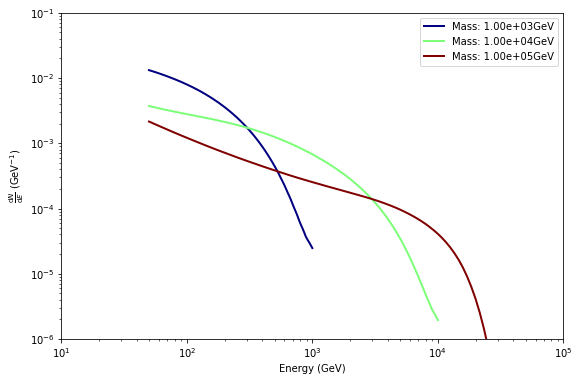

In [10]:
fig, ax = plt.subplots(figsize=(9, 6))

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(masses))]

for i , mass in enumerate( masses ) :

    evals         = (50, mass, 100)
    dmspec.mass   = mass
    dmspec.energy = evals
    
    dnde     = dmspec.spectra()
    energies = dmspec.energy
    
    ax.plot(energies, dnde, color=colors[i], lw=2, label='Mass: {:.2e}GeV'.format(mass))
    
ax.set_xlim(10, 1.e+5)
ax.set_ylim(1.0e-6, 1.0e-1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('$\\frac{\\mathrm{d}N}{\\mathrm{d}E}$ (GeV$^{-1}$)')

ax.legend(loc='best', prop={'size':10})

## Plotting the spectrum for dark-matter decays

Now, we can do the same as before changing the process to ```decay```

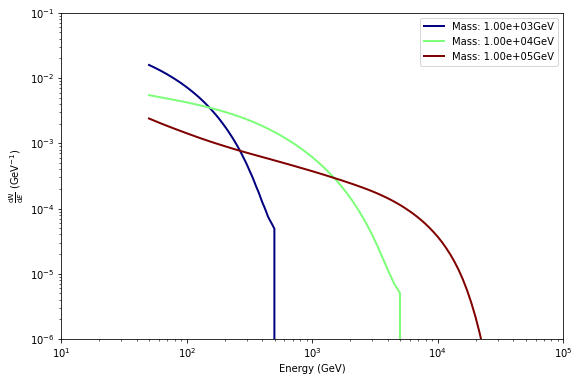

In [11]:
dmspec.process = 'decay'
fig, ax = plt.subplots(figsize=(9, 6))

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(masses))]

for i , mass in enumerate( masses ) :

    evals         = (50, mass, 100)
    dmspec.mass   = mass
    dmspec.energy = evals
    
    dnde     = dmspec.spectra()
    energies = dmspec.energy
    
    ax.plot(energies, dnde, color=colors[i], lw=2, label='Mass: {:.2e}GeV'.format(mass))
    
ax.set_xlim(10, 1.e+5)
ax.set_ylim(1.0e-6, 1.0e-1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('$\\frac{\\mathrm{d}N}{\\mathrm{d}E}$ (GeV$^{-1}$)')

ax.legend(loc='best', prop={'size':10})